## RTK visualization
#### April Novak

This notebook shows that a VERA input defined with a baffle and vessel, when run through the vera_to_shift executable, does not retain the baffle or vessel in its geometric description. The next step is to verify that VERA is running with the baffle and vessel, however. This will be investigated by making the baffle out of fuel, and out of steel, and looking at the difference in the fission source (with vacuum boundary conditions on the radial boundary).

In [1]:
import sys

import h5py as h5
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm

# path to Exnihilo-specific python modules on your machine. This is a path
# on a personal machine due to the mounting to orthanc.
sys.path.insert(0, '/Users/aprilnovak/Installs/python')
sys.path.append('/Users/aprilnovak/anaconda3/lib/python3.5/')

import exnihilotools.matplotlib as extools

extools.screen_style()
%matplotlib inline

In [2]:
# for plotting tallies
from omnibus.data import plot
from matplotlib.colors import Normalize, LogNorm

In [3]:
# for plotting geometry
from geometria import RTK_Geometry
from omnibus.raytrace.colors import ColorMap
from omnibus.raytrace.imager import Imager
from omnibus.raytrace.load import load_rtk

In [4]:
path = '/Users/aprilnovak/Mounts/orthanc/projects/nkq_analysis/vera-inputs/'

## Fission source with a thick reflector
These results show that with a thick reflector (20 m of water on all sides), the fission source does change from that with a 1 cm thick water. This proves that VERA is using the baffle and reflector when running.

In [12]:
with h5.File(path + "baffle-vessel/baffle-vessel-thick.src-extracted.shift.h5") as f:
    source = f['strength']
    size = int(np.sqrt(source.shape[0]))
    thick_source_matrix = np.empty((size, size))
    
    for i in range(size):
        for j in range(size):
            thick_source_matrix[i][j] = source[i + j]
    
    print(thick_source_matrix)
    plt.matshow(thick_source_matrix)

NameError: name 'thick_source_matrix' is not defined

## Fission source with thin barrel

[[ 0.01743757  0.01849873  0.01947991  0.00770632  0.01816968]
 [ 0.01849873  0.01947991  0.00770632  0.01816968  0.01828952]
 [ 0.01947991  0.00770632  0.01816968  0.01828952  0.01902355]
 [ 0.00770632  0.01816968  0.01828952  0.01902355  0.01959334]
 [ 0.01816968  0.01828952  0.01902355  0.01959334  0.01958926]]


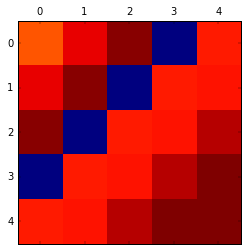

In [9]:
with h5.File(path + "baffle-vessel/baffle-vessel-thin.src-extracted.shift.h5") as f:
    source = f['strength']
    size = int(np.sqrt(source.shape[0]))
    source_matrix = np.empty((size, size))
    
    for i in range(size):
        for j in range(size):
            thin_source_matrix[i][j] = source[i + j]
    
    print(thin_source_matrix)
    plt.matshow(thin_source_matrix)

In [11]:
diff = thin_source_matrix - thick_source_matrix

NameError: name 'thin_source_matrix' is not defined